# Settings & Initialisation

In [1]:
import os
import sys
sys.path.append("../../..") 
ROOT_DIR = '/home/jovyan/tta'

from comtrade.analysis import Analysis
tta = Analysis()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)

## Reporter Area

In [3]:
from comtrade.code.reporter_area import ReporterArea
reporter_area = ReporterArea()
reporter_area_ids = reporter_area.get_ids("India")
reporter_area_ids

[{'id': '699', 'text': 'India'}, {'id': '356', 'text': 'India, excl. Sikkim'}]

## Partner Area

In [4]:
from comtrade.code.partner_area import PartnerArea
partner_area = PartnerArea()
partner_area_ids = partner_area.get_ids("lao")
partner_area_ids

[{'id': '418', 'text': "Lao People's Dem. Rep."}]

## Trade Regime

In [5]:
from comtrade.code.trade_regime import TradeRegime
trade_regime = TradeRegime()
trade_regime_ids = trade_regime.get_ids("Export")
trade_regime_ids

[{'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}]

## Data availability request

In [6]:
source = 699 # India
destination = 418 # Laos
tta.set_source_destination(source, destination)

source_status = tta.api.data_available(source, 201912, 'HS', 'M')
print(source_status)
destination_status = tta.api.data_available(destination, 201912, 'HS', 'M')
print(destination_status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '201912', 'TotalRecords': 15299, 'isOriginal': 1, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


## Import Data

In [7]:
in_imp = tta.api.get_month_data(source, destination, 1, 2019) 
la_exp = tta.api.get_month_data(destination, source, 2, 2019) 

{'r': 699, 'p': 418, 'rg': 1, 'ps': '201901', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201902', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201903', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201904', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201905', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201906', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201907', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201908', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201909', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 1, 'ps': '201910', 'px': 'HS', 'cc': 'TOTAL', 

In [8]:
df = pd.DataFrame.from_dict([in_imp, la_exp])
df.index = ['india', 'lao']
df = df.T
df['month'] = df.index
df

,india,lao,month
201901,17102,12572373,201901
201902,14297,14744128,201902
201903,12809,13904361,201903
201904,212131,884799,201904
201905,127633,15071591,201905
201906,0,8605716,201906
201907,339299,75958,201907
201908,17007,0,201908
201909,0,21605,201909
201910,34744,126796,201910


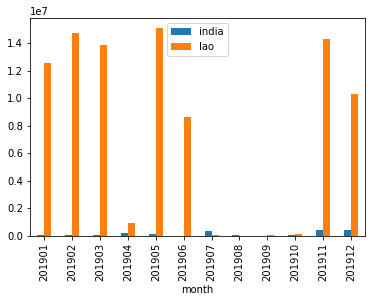

In [9]:
df.plot(kind='bar', y=['india','lao'], x='month')
plt.show()

# Export Data

In [10]:
in_exp = tta.api.get_month_data(source, destination, 2, 2019) 
la_imp = tta.api.get_month_data(destination, source, 1, 2019) 

{'r': 699, 'p': 418, 'rg': 2, 'ps': '201901', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201902', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201903', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201904', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201905', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201906', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201907', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201908', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201909', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': 699, 'p': 418, 'rg': 2, 'ps': '201910', 'px': 'HS', 'cc': 'TOTAL', 

In [11]:
df = pd.DataFrame.from_dict([in_imp, la_exp])
df.index = ['india', 'lao']
df = df.T
df['month'] = df.index
df

,india,lao,month
201901,17102,12572373,201901
201902,14297,14744128,201902
201903,12809,13904361,201903
201904,212131,884799,201904
201905,127633,15071591,201905
201906,0,8605716,201906
201907,339299,75958,201907
201908,17007,0,201908
201909,0,21605,201909
201910,34744,126796,201910


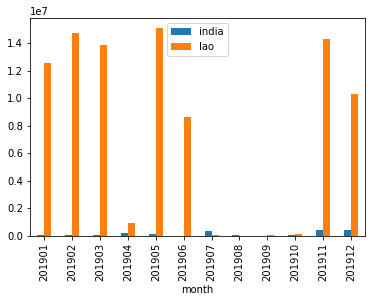

In [12]:
df.plot(kind='bar', y=['india','lao'], x='month')
plt.show()